# Regression - Interpretation

## Exercise 1: Regressive Tennis T-Test

Use a linear regression and statsmodels to run a t-test on whether Federer scores more points than his opponents in the `tennis.csv` dataset.

Give a one-paragraph interpretation of the coefficient, and the meaning of the p-value. 

Also answer the following: should your regression include a constant term? Why or why not? How would it change the interpretation of your coefficient and p-value?

In [3]:
import matplotlib.pyplot as plt 
import numpy as np 
from statsmodels.formula.api import ols
import pandas as pd
from patsy import dmatrices
import scipy.stats as sc
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
import seaborn as sns 
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

sns.set()

In [2]:
# exercise 1

df = pd.read_csv('../data/tennis.csv')
# df.columns.values # 'player1 name' | 'player2 name' | 'player1 total points won' | 'player2 total points won'

#REMOVE the empty ROWS in 'player1 name'
df1 = df.drop(np.array(df.loc[(df['player1 name']== 'NaN')].index), axis=0 )

In [3]:
x = df[['player1 name','player2 name','player1 total points won','player2 total points won', 'player2 total points total']]
x

,player1 name,player2 name,player1 total points won,player2 total points won,player2 total points total
0,Roger Federer,Andre Agassi,41.0,62.0,103.0
1,Roger Federer,Guillaume Raoux,65.0,41.0,106.0
2,Roger Federer,Richard Fromberg,79.0,69.0,148.0
3,Roger Federer,Jan Siemerink,60.0,70.0,130.0
4,Roger Federer,Orlin Stanoytchev,NaN,NaN,NaN
...,...,...,...,...,...
1174,Roger Federer,Rafael Nadal,130.0,146.0,276.0
1175,Roger Federer,Nikolay Davydenko,55.0,31.0,86.0
1176,Roger Federer,Grega Zemlja,60.0,39.0,99.0
1177,Roger Federer,Andreas Seppi,92.0,81.0,173.0


In [4]:
#df.columns.values

<AxesSubplot:>

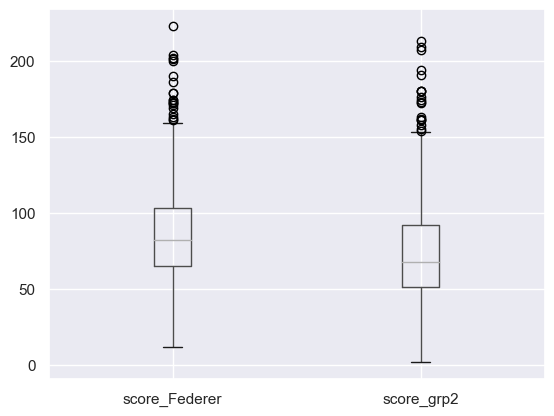

In [5]:
grp1 = np.array(df1[df1["player1 name"]=="Roger Federer"]['player1 total points won'])
#grp1 = np.array(df1['player1 total points won'])
grp1 = grp1[~np.isnan(grp1)]

grp2 = np.array(df1['player2 total points won'])
grp2 = grp2[~np.isnan(grp2)]



df_boxplot = pd.DataFrame({'score_Federer':grp1,'score_grp2':grp2})
df_boxplot.boxplot()

In [6]:
#sc.ttest_ind(df.dropna()['player1 total points total'], df.dropna()['player2 total points total'])
sc.ttest_ind(grp1, grp2, equal_var = False)


Ttest_indResult(statistic=10.088757621931203, pvalue=2.171551819471501e-23)

In [7]:
# The statistic >>> 2. meaning their a high degree of confidence the coefficient as predictors
# Pvalue <<< 0.05 
# we can reject the NULL Hypothesis that the 2 group average score is the same, with 99% confidence

In [8]:
#tennis = pd.read_csv('../data/tennis.csv')
y_federer = df['player1 total points won'].dropna()
x_other = df['player2 total points won'].dropna()

model = sm.OLS(y_federer, x_other).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     player1 total points won   R-squared (uncentered):                   0.969
Model:                                  OLS   Adj. R-squared (uncentered):              0.969
Method:                       Least Squares   F-statistic:                          3.196e+04
Date:                      Wed, 15 Feb 2023   Prob (F-statistic):                        0.00
Time:                              13:03:08   Log-Likelihood:                         -4310.3
No. Observations:                      1027   AIC:                                      8623.
Df Residuals:                          1026   BIC:                                      8628.
Df Model:                                 1                                                  
Covariance Type:                  nonrobust                                                  
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
player2 total points won     1.1242      0.006    178.783      0.000       1.112       1.137
==============================================================================
Omnibus:                       72.672   Durbin-Watson:                   1.645
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               86.996
Skew:                          -0.709   Prob(JB):                     1.29e-19
Kurtosis:                       3.147   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
#Now let's check the result when a constant is added
x = sm.add_constant(x_other)
model_const = sm.OLS(y_federer, x).fit()
model_const.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     player1 total points won   R-squared:                       0.794
Model:                                  OLS   Adj. R-squared:                  0.794
Method:                       Least Squares   F-statistic:                     3948.
Date:                      Wed, 15 Feb 2023   Prob (F-statistic):               0.00
Time:                              13:03:08   Log-Likelihood:                -4062.7
No. Observations:                      1027   AIC:                             8129.
Df Residuals:                          1025   BIC:                             8139.
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       26.2630      1.042     25.199      0.000      24.218      28.308
player2 total points won     0.8199      0.013     62.836      0.000       0.794       0.846
==============================================================================
Omnibus:                       78.409   Durbin-Watson:                   1.378
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              103.799
Skew:                          -0.640   Prob(JB):                     2.89e-23
Kurtosis:                       3.888   Cond. No.                         211.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
# WHEN adding a constant the AIC and BIC are decrease. So the model is better.
#The R-Squared is also decreased around 0.7 so the model is better at generalization
#We see that P>|t| for the constante is 0 < 0.05 i.e this constant is mandatory to the model.
#Having the INTERCEPT indicates that Federer start a match with an unfair advantage.

## Exercise 2: College admissions

Using the `college.csv` dataset, answer the following:

1. Do private schools see more admissions overall? Hint: use a binary explanatory variable for `Private`

2. Is the relation between `Top10perc` and `Top25perc` best fit using a model with only one variable, or one variable and a polynomial of degree 2? Is a constant term useful? How would you select for the best of these model specifications?

In [11]:
# exercise 2.1

df_school = pd.read_csv('../data/college.csv')
df_school.rename(columns = {'Unnamed: 0':'School'}, inplace = True)
df_school['Private'] = df_school['Private'].convert_dtypes(convert_string=True)
df_school

,School,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


In [12]:
df_school_admis = df_school[['Private', 'Enroll']]
df_school_admis.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Private  777 non-null    string
 1   Enroll   777 non-null    int64 
dtypes: int64(1), string(1)
memory usage: 12.3 KB


In [13]:
df_school_admis = df_school_admis.groupby(['Private'])['Enroll'].agg(np.sum)
df_school_admis.reset_index()
pd.DataFrame(df_school_admis)

,Enroll
Private,
No,347865
Yes,258174


In [14]:
#Private school do no see more admissions

In [15]:
#let's check with a T-test that the Null hypothesis can be rejected
grp_private = np.array(df_school[df_school['Private']=="No"]['Enroll'])
grp_public = np.array(df_school[df_school['Private']=="Yes"]['Enroll'])
sc.ttest_ind(grp_private, grp_public, equal_var = False)

Ttest_indResult(statistic=13.33871309883542, pvalue=1.648620789422413e-30)

In [16]:
# exercise 2.1
"""
Is the relation between Top10perc and Top25perc best fit using 
a model with 
.only one variable, 
.or one variable and a polynomial of degree 2?

Is a constant term useful? 
How would you select for the best of these model specifications?"""

'\nIs the relation between Top10perc and Top25perc best fit using \na model with \n.only one variable, \n.or one variable and a polynomial of degree 2?\n\nIs a constant term useful? \nHow would you select for the best of these model specifications?'

In [17]:
x = df_school['Top10perc']
y = df_school['Top25perc']
print(x.shape)
print(y.shape)

(777,)
(777,)


In [18]:
# y = ax  => ONE VARIABLE

model20 = sm.OLS(y, x).fit()

model20.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Top25perc   R-squared (uncentered):                   0.911
Model:                            OLS   Adj. R-squared (uncentered):              0.911
Method:                 Least Squares   F-statistic:                              7971.
Date:                Wed, 15 Feb 2023   Prob (F-statistic):                        0.00
Time:                        13:03:15   Log-Likelihood:                         -3332.4
No. Observations:                 777   AIC:                                      6667.
Df Residuals:                     776   BIC:                                      6671.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Top10perc      1.7275      0.019     89.281      0.000       1.690       1.766
==============================================================================
Omnibus:                      290.739   Durbin-Watson:                   1.499
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1310.349
Skew:                          -1.681   Prob(JB):                    2.89e-285
Kurtosis:                       8.401   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
# y = ax^2  => ONE VARIABLE with polynomial 2nd degree
x1 = np.square(x)

In [20]:
model21 = sm.OLS(y, x1).fit()
model21.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Top25perc   R-squared (uncentered):                   0.580
Model:                            OLS   Adj. R-squared (uncentered):              0.579
Method:                 Least Squares   F-statistic:                              1071.
Date:                Wed, 15 Feb 2023   Prob (F-statistic):                   3.12e-148
Time:                        13:03:16   Log-Likelihood:                         -3936.6
No. Observations:                 777   AIC:                                      7875.
Df Residuals:                     776   BIC:                                      7880.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Top10perc      0.0246      0.001     32.719      0.000       0.023       0.026
==============================================================================
Omnibus:                      595.574   Durbin-Watson:                   0.747
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8792.202
Skew:                          -3.464   Prob(JB):                         0.00
Kurtosis:                      17.953   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
# y = ax + b
x2 = sm.add_constant(x)
model22 = sm.OLS(y, x2).fit()
model22.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Top25perc   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     3018.
Date:                Wed, 15 Feb 2023   Prob (F-statistic):          1.87e-269
Time:                        13:03:17   Log-Likelihood:                -2805.2
No. Observations:                 777   AIC:                             5614.
Df Residuals:                     775   BIC:                             5624.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.1984      0.596     47.281      0.000      27.028      29.369
Top10perc      1.0014      0.018     54.933      0.000       0.966       1.037
==============================================================================
Omnibus:                       45.943   Durbin-Watson:                   1.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               85.462
Skew:                           0.401   Prob(JB):                     2.77e-19
Kurtosis:                       4.413   Cond. No.                         60.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
# y = ax^2 + bx + c
x3 = sm.add_constant(x)
x3 = np.array(x3)
x3
x3 = np.concatenate([x3, np.square(x3[:,1]).reshape(777,1)], axis=1)
model23 = sm.OLS(y, x3).fit()

model23.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Top25perc   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     2220.
Date:                Wed, 15 Feb 2023   Prob (F-statistic):          2.50e-321
Time:                        13:03:17   Log-Likelihood:                -2681.0
No. Observations:                 777   AIC:                             5368.
Df Residuals:                     774   BIC:                             5382.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.6786      0.845     19.738      0.000      15.020      18.337
x1             1.8140      0.050     36.229      0.000       1.716       1.912
x2            -0.0102      0.001    -17.072      0.000      -0.011      -0.009
==============================================================================
Omnibus:                      177.730   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              570.823
Skew:                           1.089   Prob(JB):                    1.12e-124
Kurtosis:                       6.590   Cond. No.                     5.65e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.65e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# let's compare model20 to model21

#model20 : y = ax  => ONE VARIABLE
R-squared (uncentered):	0.911
AIC:	6667
BIC:	6671.
P>|t| ~ 0
    
    
#model21 : y = ax^2  => ONE VARIABLE with polynomial 2nd degree
R-squared (uncentered):	0.580
AIC:	7875.
BIC:	7880
P>|t| ~ 0


# While the model20 looks like overfitting, it has the best AIC/BIC score,
# i.e best model between the 2.
# The R-Square isn't fit on model21



## Exercise 3: Auto prediction

Using the `auto.csv` dataset, perform a simple linear regression with `mpg` as the response variable and horsepower as the predictor. Answer the following:

 i. Is there a relationship between the predictor and the response?
 
 ii. How strong is the relationship between the predictor and the response?
 
 iii. Is the relationship between the predictor and the response positive or negative?

 iv. What is the predicted mpg associated with a horsepower of 98? What are the associated 95 % confidence and prediction intervals ?

 v. Make a regression plot the response and the predictor.

In [23]:
# exercise 3
df_auto = pd.read_csv('../data/auto.csv', delim_whitespace=True)
df_auto.dropna()


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
1,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
2,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
3,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
4,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
5,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4.0,140.0,86.00,2790.0,15.6,82.0,1.0,ford mustang gl
394,44.0,4.0,97.0,52.00,2130.0,24.6,82.0,2.0,vw pickup
395,32.0,4.0,135.0,84.00,2295.0,11.6,82.0,1.0,dodge rampage
396,28.0,4.0,120.0,79.00,2625.0,18.6,82.0,1.0,ford ranger


In [24]:
#CLEANING the DF

df_auto = df_auto.drop(df_auto.loc[(df_auto['horsepower'] == '?')].index, axis=0)
#df_auto.loc[(df_auto['horsepower'] == '?')]

df_auto = df_auto.drop(df_auto.loc[(df_auto['mpg'] == '-------------------------')].index, axis=0)
df_auto.loc[(df_auto['mpg'] == '-------------------------')]

df_auto['horsepower'] = df_auto['horsepower'].astype(np.float64)

df_auto['mpg'] = df_auto['mpg'].astype(np.float64)


df_auto.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 1 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    float64
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    float64
 5   acceleration  392 non-null    float64
 6   year          392 non-null    float64
 7   origin        392 non-null    float64
 8   name          392 non-null    object 
dtypes: float64(8), object(1)
memory usage: 30.6+ KB


In [25]:
x = df_auto['horsepower']
y = df_auto['mpg']
print(x.shape)
print(y.shape)

(392,)
(392,)


In [26]:
# y = ax
model30 = sm.OLS(y,x).fit()
model30.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    mpg   R-squared (uncentered):                   0.649
Model:                            OLS   Adj. R-squared (uncentered):              0.648
Method:                 Least Squares   F-statistic:                              723.7
Date:                Wed, 15 Feb 2023   Prob (F-statistic):                    5.67e-91
Time:                        13:03:22   Log-Likelihood:                         -1608.1
No. Observations:                 392   AIC:                                      3218.
Df Residuals:                     391   BIC:                                      3222.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
horsepower     0.1788      0.007     26.901      0.000       0.166       0.192
==============================================================================
Omnibus:                       13.847   Durbin-Watson:                   0.471
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                9.780
Skew:                          -0.268   Prob(JB):                      0.00752
Kurtosis:                       2.442   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
# y = ax + b
x = sm.add_constant(x)
model31= sm.OLS(y,x).fit()
model31.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Wed, 15 Feb 2023   Prob (F-statistic):           7.03e-81
Time:                        13:03:22   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
# y = ax^2 + bx +c
x31 = sm.add_constant(x)
x31 = np.array(x31)

x31 = np.concatenate([x31, np.square(x31[:,1]).reshape(392,1)], axis=1)
model31= sm.OLS(y,x31).fit()
model31.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     428.0
Date:                Wed, 15 Feb 2023   Prob (F-statistic):           5.40e-99
Time:                        13:03:23   Log-Likelihood:                -1133.2
No. Observations:                 392   AIC:                             2272.
Df Residuals:                     389   BIC:                             2284.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         56.9001      1.800     31.604      0.000      53.360      60.440
x1            -0.4662      0.031    -14.978      0.000      -0.527      -0.405
x2             0.0012      0.000     10.080      0.000       0.001       0.001
==============================================================================
Omnibus:                       16.158   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.662
Skew:                           0.218   Prob(JB):                     2.20e-07
Kurtosis:                       4.299   Cond. No.                     1.29e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
#i. Is there a relationship between the predictor and the response?

# The 2nd degree polynomial shows the best fit R-Squared ~ 0.7
# The coefficients have the Pvalues < 0.05
#meaning there is a strong relation between mpg vs horsepower

In [30]:
#ii. How strong is the relationship between the predictor and the response?

print('correlation x to y:', x.corr(y))

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
#iii. Is the relationship between the predictor and the response positive or negative?
# the correlation indicates y = -3/4 x 
# NEGATIVE response

In [31]:
#iv. What is the predicted mpg associated with a horsepower of 98? What are the associated 95 % confidence and prediction intervals ?
x_test = [1, 98, 98**2]

#x_test = np.concatenate([x_test, np.square(x_test[:,1]).reshape(1,1), axis=1])
y_predict = model31.predict(x_test)
y_predict

#np.concatenate([x31, np.square(x31[:,1]).reshape(392,1)], axis=1)

array([23.03158468])

In [32]:
#v. Make a regression plot the response and the predictor.

list_parameters = np.array(model31.params)

INTERCEPT = list_parameters[0]
b = list_parameters[1]
a = list_parameters[2]



In [33]:
x_min = df_auto['horsepower'].min()
x_max = df_auto['horsepower'].max()

x_plot = np.linspace(x_min,x_max,392)

Y = INTERCEPT + b*x_plot + a*x_plot**2



#PLOTTING
plt.scatter(x, y, color='b')
plt.plot(x_plot, Y, 'r')
#plt.xlim(0,60)
#plt.ylim(0,200)
plt.xlabel('HP')
plt.ylabel('MPG')
plt.show()

ValueError: x and y must be the same size

## Exercise 4: Auto Multiple Regression

Perform a multiple linear regression with `mpg` as the response and all other variables except name in `auto` as the predictors. Comment on the output:

i. Is there a relationship between the predictors and the response?

ii. Which predictors appear to have a statistically significant relationship to the response?

iii. What does the coefficient for the year variable suggest?

iv. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers?

v. Is there heteroscedasticity in the fit?

In [113]:
# exercise 4
list_cols = df_auto.columns
#list_cols
df_auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
1,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
2,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
3,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
4,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
5,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4.0,140.0,86.0,2790.0,15.6,82.0,1.0,ford mustang gl
394,44.0,4.0,97.0,52.0,2130.0,24.6,82.0,2.0,vw pickup
395,32.0,4.0,135.0,84.0,2295.0,11.6,82.0,1.0,dodge rampage
396,28.0,4.0,120.0,79.0,2625.0,18.6,82.0,1.0,ford ranger


In [67]:
x4 = df_auto[['cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin']]
y4 = df_auto[['mpg']]



,mpg
1,18.0
2,15.0
3,18.0
4,16.0
5,17.0
...,...
393,27.0
394,44.0
395,32.0
396,28.0


In [36]:
print(x4.shape)
print(y4.shape)



(392, 7)
(392, 1)


In [37]:
X4 = sm.add_constant(x4)


In [38]:

cyl_mean = df_auto['cylinders'].mean()
dis_mean = df_auto['displacement'].mean()
hp_mean = df_auto['horsepower'].mean()
weig_mean = df_auto['weight'].mean()
acc_mean = df_auto['acceleration'].mean()
year_mean = df_auto['year'].mean()
orig_mean = df_auto['origin'].mean()

In [39]:
X4['cylinders'] = cyl_mean
X4['displacement'] = dis_mean
#X4['horsepower']=hp_mean # <= should be independant coef
X4['weight']=weig_mean
X4['acceleration']=acc_mean
X4['year']=year_mean
X4['origin']=orig_mean
X4

,const,cylinders,displacement,horsepower,weight,acceleration,year,origin
1,1.0,5.471939,194.41199,130.0,2977.584184,15.541327,75.979592,1.576531
2,1.0,5.471939,194.41199,165.0,2977.584184,15.541327,75.979592,1.576531
3,1.0,5.471939,194.41199,150.0,2977.584184,15.541327,75.979592,1.576531
4,1.0,5.471939,194.41199,150.0,2977.584184,15.541327,75.979592,1.576531
5,1.0,5.471939,194.41199,140.0,2977.584184,15.541327,75.979592,1.576531
...,...,...,...,...,...,...,...,...
393,1.0,5.471939,194.41199,86.0,2977.584184,15.541327,75.979592,1.576531
394,1.0,5.471939,194.41199,52.0,2977.584184,15.541327,75.979592,1.576531
395,1.0,5.471939,194.41199,84.0,2977.584184,15.541327,75.979592,1.576531
396,1.0,5.471939,194.41199,79.0,2977.584184,15.541327,75.979592,1.576531


In [40]:

#X4 = np.concatenate([X, np.square(X[:,1]).reshape(392,1)], axis=1)

In [41]:
model4 = sm.OLS(y4,X4).fit()
model4.summary()

/Users/Sam/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1918: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Wed, 15 Feb 2023   Prob (F-statistic):           7.03e-81
Time:                        13:04:00   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         4.482e-06   8.05e-08     55.660      0.000    4.32e-06    4.64e-06
cylinders     2.453e-05   4.41e-07     55.660      0.000    2.37e-05    2.54e-05
displacement     0.0009   1.57e-05     55.660      0.000       0.001       0.001
horsepower      -0.1578      0.006    -24.489      0.000      -0.171      -0.145
weight           0.0133      0.000     55.660      0.000       0.013       0.014
acceleration  6.966e-05   1.25e-06     55.660      0.000    6.72e-05    7.21e-05
year             0.0003   6.12e-06     55.660      0.000       0.000       0.000
origin        7.066e-06   1.27e-07     55.660      0.000    6.82e-06    7.32e-06
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                          inf
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [62]:
p4 = model4.params

In [138]:
X4fit = np.linspace(X4['horsepower'].min(),X4['horsepower'].max(),392).reshape(392,1)
X4fit_df = pd.DataFrame(X4fit, columns=['horsepower'])
X4fit_df['cylinders'] = X4['cylinders'].mean()
X4fit_df['displacement'] = X4['displacement'].mean()
X4fit_df['weight'] = X4['weight'].mean()
X4fit_df['year'] = X4['year'].mean()
X4fit_df['origin'] = X4['origin'].mean()
X4fit_df['acceleration'] = X4['acceleration'].mean()
X4fit_df['const'] = 1

X4fit_df


,horsepower,cylinders,displacement,weight,year,origin,acceleration,const
0,46.000000,5.471939,194.41199,2977.584184,75.979592,1.576531,15.541327,1
1,46.470588,5.471939,194.41199,2977.584184,75.979592,1.576531,15.541327,1
2,46.941176,5.471939,194.41199,2977.584184,75.979592,1.576531,15.541327,1
3,47.411765,5.471939,194.41199,2977.584184,75.979592,1.576531,15.541327,1
4,47.882353,5.471939,194.41199,2977.584184,75.979592,1.576531,15.541327,1
...,...,...,...,...,...,...,...,...
387,228.117647,5.471939,194.41199,2977.584184,75.979592,1.576531,15.541327,1
388,228.588235,5.471939,194.41199,2977.584184,75.979592,1.576531,15.541327,1
389,229.058824,5.471939,194.41199,2977.584184,75.979592,1.576531,15.541327,1
390,229.529412,5.471939,194.41199,2977.584184,75.979592,1.576531,15.541327,1


In [147]:
#y4_fit = p4[0] + p4[1]*cyl_mean + p4[2]*dis_mean+ p4[3]*X4fit + p4[4]*weig_mean + p4[5]*acc_mean + p4[6]*year_mean + p4[7]*orig_mean 

y4_fit = model4.predict(X4)
y4_fit


1      19.416046
2      13.891480
3      16.259151
4      16.259151
5      17.837598
         ...    
393    26.361214
394    31.727935
395    26.676903
396    27.466127
397    26.992593
Length: 392, dtype: float64

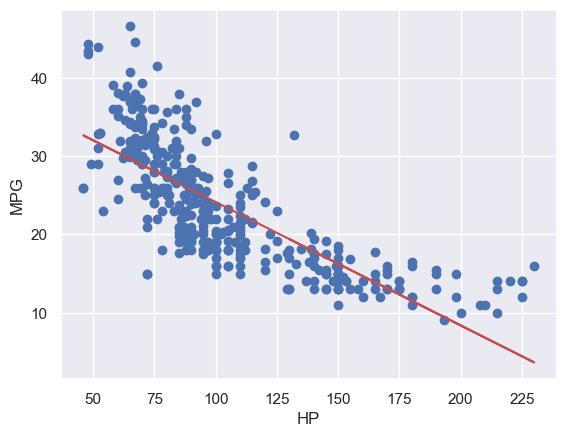

In [148]:
#y4_fit = model4.predict(X4fit)


#PLOTTING
plt.scatter(x4['horsepower'].values, y4['mpg'].values, color='b')

plt.plot(X4['horsepower'], y4_fit, 'r') #We reused the X from the original dataset

#plt.xlim(0,60)
#plt.ylim(0,200)
plt.xlabel('HP')
plt.ylabel('MPG')
plt.show()

In [ ]:
# i. Is there a relationship between the predictors and the response?
Yes there is a strong relationship between
the predictor Horsepower 
and the Response MPG.
When averaging all other 6 predictors, and only having Horsepower going 
between Horsepower.Min() to Horsepower.Max()
The model ouputs Y = ( X_horsepower * -0.1578 )  + other features impact

Another proof is that Pvalue (Horsepower)~0 <<<0.05




In [ ]:
# ii. Which predictors appear to have a statistically significant relationship to the response?
From the Model4.summary()
we can see that all Pvalue ~ 0 <<<0.05 for all the Coefficients.
Conclusion: All the coefficients have a meaningful impact on the output MPG
There is NO degree of Freedom

In [ ]:
# iii. What does the coefficient for the year variable suggest?

To my understanding, every year the year would have the following impact on the MPG:
MPG is a combinaison of the other feature including year * 0.0003.
This would mean every year contribute to increase the MPG,
while the Horsepower contribute to decrease the MPG


In [ ]:
# iv. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers?
R-squared:	0.606 : The Fit could be improved
Skew:	0.492
Kurtosis:	3.299
    
Google says: 
A- For normally distributed data, the skewness should be about zero. 
    For unimodal continuous distributions, a skewness value greater than zero means 
    that there is more weight in the right tail of the distribution. 

B- The values for asymmetry and kurtosis between -2 and +2 are considered acceptable
    in order to prove normal univariate distribution (George & Mallery, 2010). 
    Hair et al. (2010) and Bryne (2010) argued that data is considered to be normal if skewness is between ‐2 to +2
    and kurtosis is between ‐7 to +7.
    
In our case: 
-2 <   Skew  <  2 : OK
-7 < Kurtosis < 7 : OK
The Error on our Model is Normally distributed

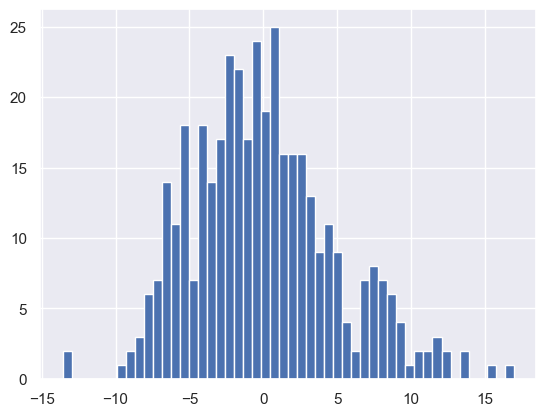

In [163]:
plt.hist(model4.resid, bins=50)
plt.show()

In [ ]:
The residual histogram does not suggest meaningfull outlier.

In [ ]:
# v. Is there heteroscedasticity in the fit?

In [ ]:
Yes,
On the left of the fit graph,
we can identify hesteroscedasticity by the cone shape of the points around the regression line.


## Exercise 5: Car Seats

This question should be answered using the Carseats data set

1. Fit a multiple regression model to predict Sales using Price, Urban, and US.

2. Provide an interpretation of each coefficient in the model. Be careful—some of the variables in the model are qualitative!

3. For which of the predictors can you reject the null hypothesis H0 : βj = 0?

4. On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of association with the outcome.

5. How well do the models in 1 and 4 fit the data? Explain which statistics show the difference.

6. Using the model from (e), obtain 95 % confidence intervals for the coefficient(s).

In [95]:
# exercise 5
df_car = pd.read_csv('../data/carseats.csv')
df_car.dropna()

df_car = df_car.drop(['ShelveLoc'], axis=1)
df_car['Urban'] = df_car['Urban'].astype(bool)
df_car['US'] = df_car['US'].astype(bool)


print(df_car['US'].describe())
print(df_car['US'].describe())

count      400
unique       1
top       True
freq       400
Name: US, dtype: object
count      400
unique       1
top       True
freq       400
Name: US, dtype: object


In [97]:
df_car = pd.get_dummies(df_car, columns=['Urban', 'US'])
df_car

# URBAN and US are always set at True in the dataset. So we won't see the impact of not having them

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban_True,US_True
0,9.50,138,73,11,276,120,42,17,1,1
1,11.22,111,48,16,260,83,65,10,1,1
2,10.06,113,35,10,269,80,59,12,1,1
3,7.40,117,100,4,466,97,55,14,1,1
4,4.15,141,64,3,340,128,38,13,1,1
...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,1,1
396,6.14,139,23,3,37,120,55,11,1,1
397,7.41,162,26,12,368,159,40,18,1,1
398,5.94,100,79,7,284,95,50,12,1,1


In [98]:
# 1. Fit a multiple regression model to predict Sales using Price, Urban, and US.

x_car= df_car[['Price', 'Urban_True', 'US_True']]
y_car= df_car[['Sales']]

X_car=sm.add_constant(x_car,has_constant='add') # <= only add const if there isn't already a column with 1s
X_car

,const,Price,Urban_True,US_True
0,1.0,120,1,1
1,1.0,83,1,1
2,1.0,80,1,1
3,1.0,97,1,1
4,1.0,128,1,1
...,...,...,...,...
395,1.0,128,1,1
396,1.0,120,1,1
397,1.0,159,1,1
398,1.0,95,1,1


In [99]:

model_car = sm.OLS(y_car,X_car).fit()
model_car.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     98.25
Date:                Thu, 16 Feb 2023   Prob (F-statistic):           7.62e-21
Time:                        07:35:57   Log-Likelihood:                -938.23
No. Observations:                 400   AIC:                             1880.
Df Residuals:                     398   BIC:                             1888.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.5473      0.211     21.558      0.000       4.133       4.962
Price         -0.0531      0.005     -9.912      0.000      -0.064      -0.043
Urban_True     4.5473      0.211     21.558      0.000       4.133       4.962
US_True        4.5473      0.211     21.558      0.000       4.133       4.962
==============================================================================
Omnibus:                        2.537   Durbin-Watson:                   1.892
Prob(Omnibus):                  0.281   Jarque-Bera (JB):                2.611
Skew:                           0.175   Prob(JB):                        0.271
Kurtosis:                       2.816   Cond. No.                     2.71e+33
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.58e-61. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
# 2. Provide an interpretation of each coefficient in the model.
# Be careful—some of the variables in the model are qualitative!

R-squared:	0.198 : <<< 0.7: the model doesn't really fit to its best.
const	4.5473 : 
Price	-0.0531 : The less the price, the more the sales
Urban_True	4.5473 : The Urban environment brings 4.5473 more Sales than from the Intercept
US_True	4.5473 : The Us environment brings 4.5473 more Sales than from the Intercept 
        

In [ ]:
# 3. For which of the predictors can you reject the null hypothesis H0 : βj = 0?

All Pvalue =0 : i.e all coefficients are meaningful in impacting the Sales
But since the URBAN and US are always set to True, we might as well just 
study the impact of the Price in an Urban environment in the US

In [102]:
# 4. On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of association with the outcome.
x1 = df_car[['Price']]
y1 = df_car[['Sales']]

X1 = sm.add_constant(x1)
X1

,const,Price
0,1.0,120
1,1.0,83
2,1.0,80
3,1.0,97
4,1.0,128
...,...,...
395,1.0,128
396,1.0,120
397,1.0,159
398,1.0,95


In [105]:
model_car1 = sm.OLS(y1, X1).fit()
model_car1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     98.25
Date:                Thu, 16 Feb 2023   Prob (F-statistic):           7.62e-21
Time:                        07:44:20   Log-Likelihood:                -938.23
No. Observations:                 400   AIC:                             1880.
Df Residuals:                     398   BIC:                             1888.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.6419      0.633     21.558      0.000      12.398      14.886
Price         -0.0531      0.005     -9.912      0.000      -0.064      -0.043
==============================================================================
Omnibus:                        2.537   Durbin-Watson:                   1.892
Prob(Omnibus):                  0.281   Jarque-Bera (JB):                2.611
Skew:                           0.175   Prob(JB):                        0.271
Kurtosis:                       2.816   Cond. No.                         591.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:

# 5. How well do the models in 1 and 4 fit the data? Explain which statistics show the difference.
AIC | BIC are the same for both models
The R-Square is exactly the same for both models
Because we have removed URBAN and US from the model, the INTERCEPT is now 3 times higher to includes the Urban, US impact.
Price	-0.0531 : has the same slope as in the previous model.


In [ ]:

# 6. Using the model from (e), obtain 95 % confidence intervals for the coefficient(s).

In [ ]:
model from (e) ????